[*********************100%%**********************]  1 of 1 completed


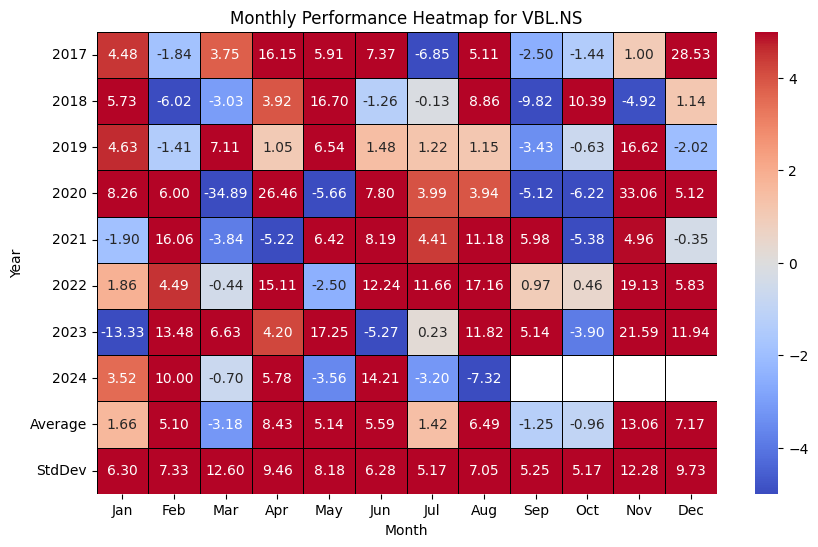

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ticker = 'VBL.NS'  
start_date = '2015-01-01'
end_date = '2024-12-31'

# Fetching and preprocessing data
data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
data['Monthly Return'] = data['Close'].pct_change() * 100
data['Year'] = data.index.year
data['Month'] = data.index.month

# Creating heatmap
heatmap_data = data.pivot_table(values='Monthly Return', index='Year', columns='Month')
heatmap_data = heatmap_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
heatmap_data.loc['Average'] = heatmap_data.mean()
heatmap_data.loc['StdDev'] = heatmap_data.std()

vmin, vmax = -5 , 5


# ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', center=0, vmin=vmin, vmax=vmax, linewidths=0.5, linecolor='black')
plt.title(f'Monthly Performance Heatmap for {ticker}')
plt.xlabel('Month')
plt.ylabel('Year')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12) + 0.5, labels=month_labels)

plt.yticks(np.arange(len(heatmap_data.index)) + 0.5, heatmap_data.index)


plt.show()
